In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
wine=pd.read_csv('../input/wine-quality/winequalityN.csv')

In [3]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
wine['fixed acidity']=wine['fixed acidity'].fillna(wine['fixed acidity'].mean())
wine['volatile acidity']=wine['volatile acidity'].fillna(wine['volatile acidity'].mean())
wine['citric acid']=wine['citric acid'].fillna(wine['citric acid'].mean())
wine['residual sugar']=wine['residual sugar'].fillna(wine['residual sugar'].mean())
wine['chlorides']=wine['chlorides'].fillna(wine['chlorides'].mean())
wine['pH']=wine['pH'].fillna(wine['pH'].mean())
wine['sulphates']=wine['sulphates'].fillna(wine['sulphates'].mean())

In [5]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
X=wine.iloc[:,[12]]

In [7]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
sce= StandardScaler()
x=sce.fit_transform(X)
x

array([[ 0.20799905],
       [ 0.20799905],
       [ 0.20799905],
       ...,
       [ 0.20799905],
       [-0.93722961],
       [ 0.20799905]])

In [8]:
w1=wine.iloc[:,1:12]
print(w1)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [9]:
w2=wine.iloc[:,12]


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(w1)

In [11]:
principalComponents

array([[ 56.71859519,   1.80583369],
       [ 11.84866887, -19.90512303],
       [-18.28844618,   3.84827411],
       ...,
       [-74.11345473,  15.99233454],
       [-69.5385634 ,  17.97886794],
       [-74.64836631,   4.85634586]])

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, wine.iloc[:,12]], axis = 1)

In [13]:
finalDf

,principal component 1,principal component 2,quality
0,56.718595,1.805834,6
1,11.848669,-19.905123,6
2,-18.288446,3.848274,6
3,72.226040,-0.178224,6
4,72.226040,-0.178224,6
...,...,...,...
6492,-69.542222,17.978027,5
6493,-61.117009,23.174131,6
6494,-74.113455,15.992335,6
6495,-69.538563,17.978868,5


In [14]:
x=finalDf.iloc[:,[0,1]].values
print(x)

[[ 56.71859519   1.80583369]
 [ 11.84866887 -19.90512303]
 [-18.28844618   3.84827411]
 ...
 [-74.11345473  15.99233454]
 [-69.5385634   17.97886794]
 [-74.64836631   4.85634586]]


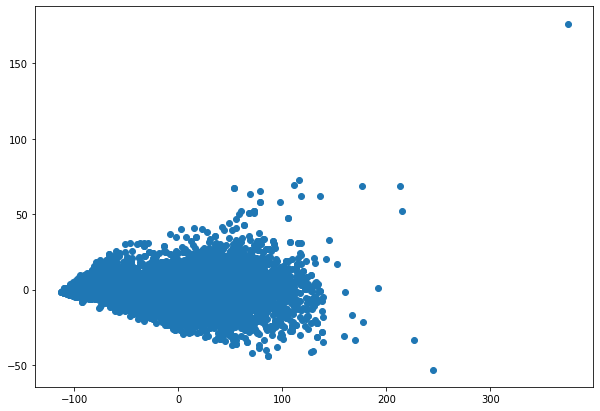

In [15]:
#Plotting 
plt.figure(figsize=(10, 7))  
plt.scatter(x[:,0],x[:,1], cmap='rainbow')

In [16]:
y=finalDf.iloc[:,2].values

In [17]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 1 1 ... 0 0 0]


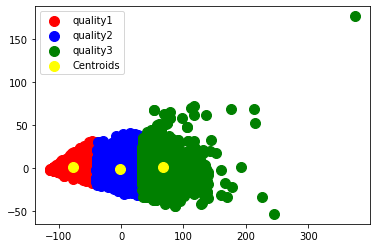

In [18]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'quality1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'quality2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'quality3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()





In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x,y_kmeans)
print("For n_clusters =", 3,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5136852836942363
